In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
%matplotlib inline

In [12]:
# Load the dataset
file_path = "./data/subset_dataset.csv"  # Change this to your actual file path
df = pd.read_csv(file_path, parse_dates=['Datetime'], index_col='Datetime')

In [13]:
# Display basic info
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 51881 entries, 2006-12-16 17:24:00 to 2007-01-21 18:04:00
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    51881 non-null  float64
 1   Global_reactive_power  51881 non-null  float64
 2   Voltage                51881 non-null  float64
 3   Global_intensity       51881 non-null  float64
 4   Sub_metering_1         51881 non-null  float64
 5   Sub_metering_2         51881 non-null  float64
 6   Sub_metering_3         51881 non-null  float64
dtypes: float64(7)
memory usage: 3.2 MB
None


In [14]:
# Summary Statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       Global_active_power  Global_reactive_power       Voltage  \
count         51881.000000           51881.000000  51881.000000   
mean              1.697758               0.137377    240.956330   
std               1.356739               0.119950      3.599614   
min               0.194000               0.000000    226.320000   
25%               0.402000               0.000000    238.540000   
50%               1.444000               0.126000    241.220000   
75%               2.466000               0.204000    243.500000   
max               9.272000               0.862000    251.700000   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
count      51881.000000    51881.000000    51881.000000    51881.000000  
mean           7.185829        1.240493        1.966250        7.288362  
std            5.714233        6.549674        7.907839        8.626154  
min            0.800000        0.000000        0.000000        0.000000  
25%  

In [15]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64


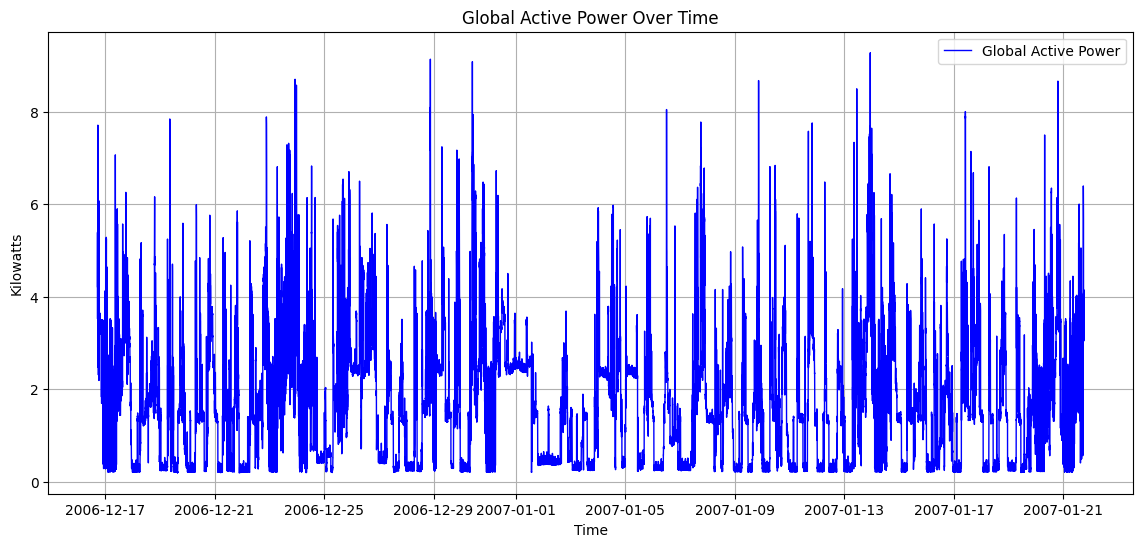

In [16]:
# Plot Global Active Power over time
plt.figure(figsize=(14, 6))
plt.plot(df['Global_active_power'], label='Global Active Power', color='blue', linewidth=1)
plt.title('Global Active Power Over Time')
plt.xlabel('Time')
plt.ylabel('Kilowatts')
plt.legend()
plt.grid()
plt.show()

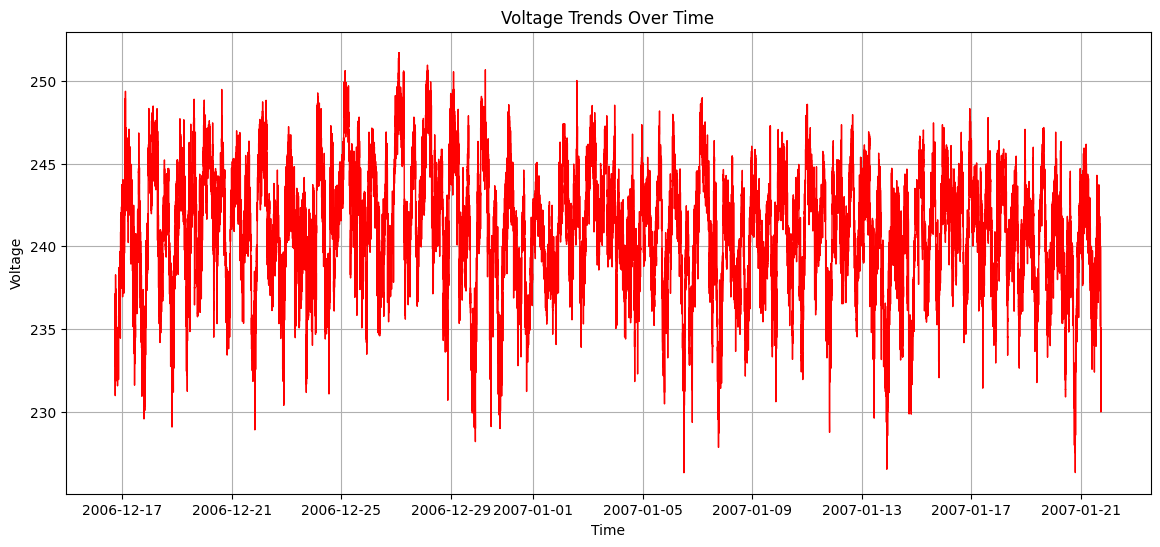

In [17]:
# Voltage Trends
plt.figure(figsize=(14, 6))
plt.plot(df['Voltage'], color='red', linewidth=1)
plt.title('Voltage Trends Over Time')
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.grid()
plt.show()

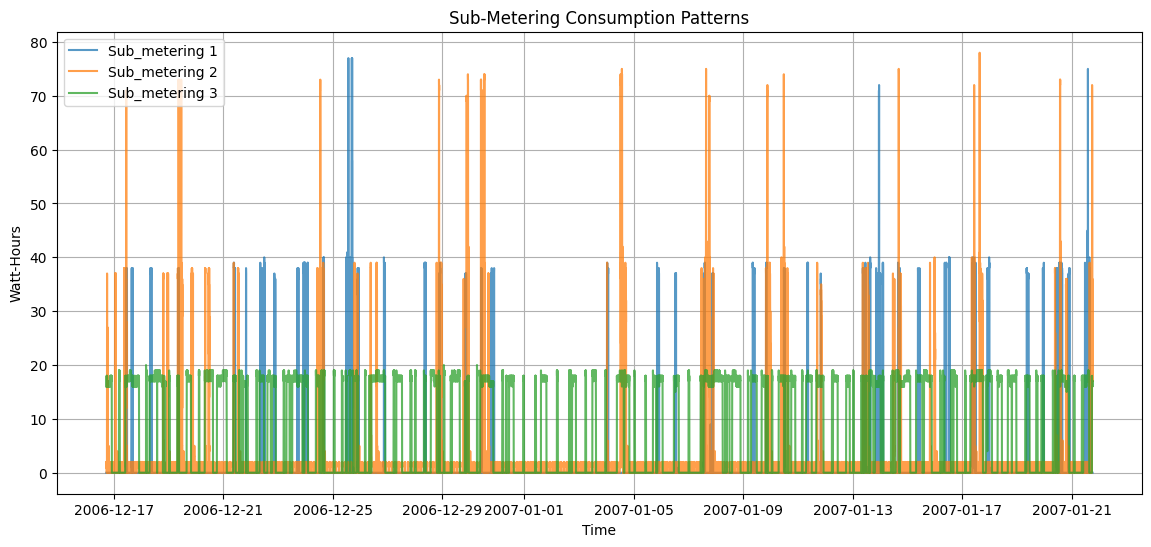

In [18]:
# Sub-metering Consumption Patterns
plt.figure(figsize=(14, 6))
plt.plot(df['Sub_metering_1'], label='Sub_metering 1', alpha=0.75)
plt.plot(df['Sub_metering_2'], label='Sub_metering 2', alpha=0.75)
plt.plot(df['Sub_metering_3'], label='Sub_metering 3', alpha=0.75)
plt.title('Sub-Metering Consumption Patterns')
plt.xlabel('Time')
plt.ylabel('Watt-Hours')
plt.legend()
plt.grid()
plt.show()

In [19]:
# Rolling Mean and Standard Deviation
rolling_window = 50  # Adjust based on time resolution
df['rolling_mean'] = df['Global_active_power'].rolling(window=rolling_window).mean()
df['rolling_std'] = df['Global_active_power'].rolling(window=rolling_window).std()

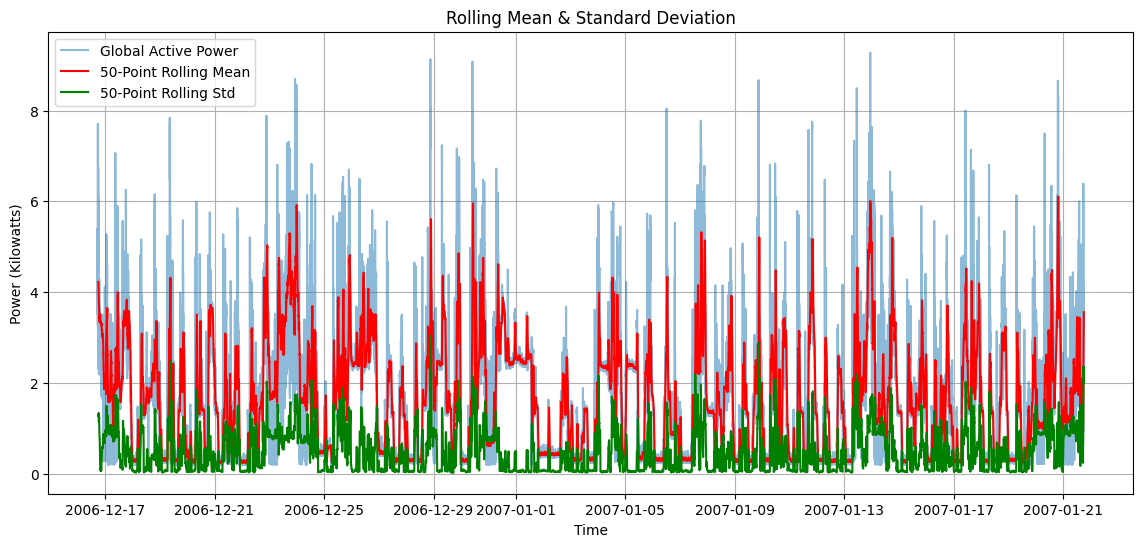

In [20]:
plt.figure(figsize=(14, 6))
plt.plot(df['Global_active_power'], label='Global Active Power', alpha=0.5)
plt.plot(df['rolling_mean'], label=f'{rolling_window}-Point Rolling Mean', color='red')
plt.plot(df['rolling_std'], label=f'{rolling_window}-Point Rolling Std', color='green')
plt.title('Rolling Mean & Standard Deviation')
plt.xlabel('Time')
plt.ylabel('Power (Kilowatts)')
plt.legend()
plt.grid()
plt.show()

In [22]:
# Seasonal Decomposition
decompose_result = seasonal_decompose(df['Global_active_power'].dropna(), model='additive', period=1440)  # 1-minute intervals, 1440 per day

<Figure size 1200x800 with 0 Axes>

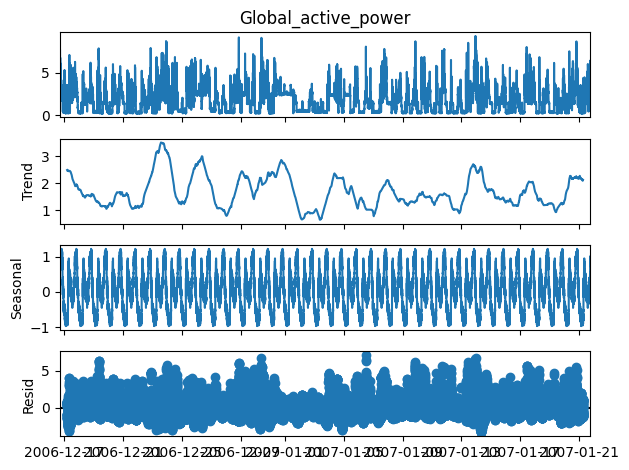

In [23]:
plt.figure(figsize=(12, 8))
decompose_result.plot()
plt.show()